![wine_chalkboard](https://user-images.githubusercontent.com/19881320/54493655-d8c4ea00-48a8-11e9-8b50-28394f91ba62.jpg)

<h1><center>Wine Review Analysis<center></h1>

<h2><center>Team Pura Pythonic Vida</center></h2>

<p align="center">
  <img width="180" src="https://user-images.githubusercontent.com/19881320/54484151-b85c4780-4836-11e9-923f-c5e0e5afe866.jpg">
</p>


## Contact Information

William Ponton: [LinkedIn](https://www.linkedin.com/in/williamponton/) 

Email: [@gorbulus](waponton@gmail.com)

REPL: [@gorbulus](https://repl.it/@gorbulus)

Github: [gorbulus](https://github.com/gorbulus)

## Wine Review Analysis

Started: 2.17.19

Completed: 3.17.19

## Project goals

0.0 Import and inspect the dataset using ```pandas```.

1.0 Analyze the dataset using ```pandas``` and ```numpy```.

2.0 Create visualizations using ```matplotlib``` and ```seaborn```.

3.0 Interpret meanings from the data using the ```Scientific Method``` ("Data Science!").

# Data Science Libraries

To get everything running in this project:

```pip install -r requirements.txt```

First, we will grab the industry standard Data Science libraries to analyze the dataset of 150,930 records.

Python convention is important to follow, so we will use the standard aliases for each of the libraries (for example: ```numpy as np```).

- Analysis tools
    - NumPy
    - Pandas
- Visualization tools
    - Matplotlib
    - Seaborn
    - Bokeh

## Import Modules

In [1]:
# Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import bokeh as bk
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In Jupyter Notebooks, we can declare ```%matplotlib inline``` to contain the ```matplotlib``` charts to the notebook's directory.

In [2]:
%matplotlib inline
# Inline matplotlib (keep charts in this nb)
import matplotlib.pyplot as plt

Ignore irrelevant warnings for a clean presentation.  All code is working and functional.

In [3]:
import warnings
warnings.filterwarnings('ignore')
# This was a warning on the KDE Plot for 2D topo mappings

# 0.0 Import & Inspect the Dataset

The data is located in the ```app_data/winemag-data_first150k.csv``` CSV file.
We can use the ```read_csv()``` method in the Pandas library to load the contents of the CSV file into a Pandas ```DataFrame()``` object.  Python uses the ```index_col``` parameter to tell the Pandas ```read_csv``` method that the first line of information in the file contains the names of the DataFrame columns delineated by a comma (",").  We can also use custom column names by passing a list of strings to the ```names``` argument in the method.  ```read_csv``` will assign each string from the list to the column in the CSV file for display.

## Data Columns

1. Country  - The country of origin of the wine.

2. Description - The description of the wine's flavor profile.

3. Designation - The vineyard where the wine's grapes are sourced.

4. Points - The number of points Wine Enthusiast  Magazine rated the wine on a scale of 1-100.

5. Price - The cost for a single bottle of the wine.

6. Province - The province or state that the wine is from.

7. Region 1 - The wine growing area in a province or state (for example, Napa Valley in California).

8. Region 2 - (Optional) A more specific region in a wine growing area (for example, Rutherford inside Napa Valley).

9. Variety - The type of grapes used to make the wine (for example, Pinot Noir).

10. Winery - The winery that made the wine.

In [4]:
# A list of the column names to be displayed:
column_names = ["Index", "Country", "Description", "Designation", "Points", "Price", 
             "Province", "Region_1", "Region_2", "Variety", "Winery"]

In [5]:
# Reading the CSV file using the col_names list in the names parameter:
reviews_df = pd.read_csv("app_data/winemag-data_first150k.csv", sep=",", header=1, 
                        names = column_names, index_col=0)

The ```.shape()``` method displays a tuple of the (rows, columns) in the dataframe.

Here we can quickly check that all the records have loaded (about 150,930)

In [6]:
# Dataframe shape
shape = reviews_df.shape
print("The shape of the dataframe (rows, columns):\t {}".format(shape))

The shape of the dataframe (rows, columns):	 (150929, 10)


We can use the ```.head()``` method to display the "head" of the dataset after it has been converted to a Pandas ```DataFrame``` object, ```reviews_df```.

In [7]:
# Display the first ten records:
reviews_df.head(10)

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Variety,Winery
Index,,,,,,,,,,
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


### Data Types

Using the ```.info()``` method in ```pandas``` displays:

```Column name | Review Count | NULL | DataType```

- ```non-null``` represents a required column for the dataframe object
- The data type "object" represents a string or a NaN (or np.Null) value)

```.info()``` ends with a sum of the different data types:

```dtypes: float(1), int64(1), object(8)```

In [8]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150929 entries, 1 to 150929
Data columns (total 10 columns):
Country        150924 non-null object
Description    150929 non-null object
Designation    105194 non-null object
Points         150929 non-null int64
Price          137234 non-null float64
Province       150924 non-null object
Region_1       125869 non-null object
Region_2       60952 non-null object
Variety        150929 non-null object
Winery         150929 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


We can also use ```.dtypes``` to display only the datatypes.  Here the datatype of the ```DataFrame()``` object are also included.

In [9]:
# Dislpays the datatypes of the reviews_df DataFrame objectL
reviews_df.dtypes

Country         object
Description     object
Designation     object
Points           int64
Price          float64
Province        object
Region_1        object
Region_2        object
Variety         object
Winery          object
dtype: object

### Handling null values

Now we need to deal with those pesky (Not a Number) ```NaN``` and ```np.null``` values and calculate the percentage of missing.

First we can see if any of the columns has missing data using ```.isnull().any()```

In [10]:
# Boolean - True if column has null value, False if no null values:
reviews_df.isnull().any()

Country         True
Description    False
Designation     True
Points         False
Price           True
Province        True
Region_1        True
Region_2        True
Variety        False
Winery         False
dtype: bool

The following columns have values where ```.isnull()``` evaluates to ```True```:

- Country
- Designation
- Price
- Province
- Region_1
- Region_2


Next, we can see the sum of missing values in each column.

In [11]:
# The sum of null values per column:
reviews_df.isnull().sum()

Country            5
Description        0
Designation    45735
Points             0
Price          13695
Province           5
Region_1       25060
Region_2       89977
Variety            0
Winery             0
dtype: int64

We will allow ```Designation, Region_1, Region_2``` to have a null value, but will want to handle the missing Prices and Country records.

 #### Country
 First, let's drop the 5 records that are missing the Country value.  They represent a very small sample of the dataset, and won't affect the results.

In [12]:
# Find the null values in the Country column:
reviews_df[reviews_df.Country.isnull()]

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Variety,Winery
Index,,,,,,,,,,
1133,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,NaN,NaN,Assyrtiko,Tsililis
1440,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Red Blend,Büyülübağ
68226,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
113016,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
135696,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas


In [13]:
# Confirm dataframe shape
reviews_df.shape

(150929, 10)

In [14]:
# Drop the records with null values for "Country", update the reviews_df dataframe:
reviews_df = reviews_df.dropna(how="any", subset=["Country"])

In [15]:
# Confirm null values have been dropped:
reviews_df.shape

(150924, 10)

In [16]:
# Display confirmation of no records with "Country" null values:
reviews_df[reviews_df.Country.isnull()]

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Variety,Winery
Index,,,,,,,,,,


#### Price

Next, we will calculate the impact of dropping the missing prices from the dataset.

In [17]:
reviews_df.isnull().sum()

Country            0
Description        0
Designation    45735
Points             0
Price          13695
Province           0
Region_1       25055
Region_2       89972
Variety            0
Winery             0
dtype: int64

In [18]:
# Calculate the percentage of remaining records if missing prices are dropped:
total_records = len(reviews_df)
missing_prices = reviews_df["Price"].isnull().sum()
missing_ratio = 100 - ((missing_prices / total_records) * 100)
print("Missing prices: {}".format(missing_prices)+ "\n" +
      "Total records: {}".format(total_records) + "\n" + 
      "Percentage remaining: {:.2f}%".format(missing_ratio))

Missing prices: 13695
Total records: 150924
Percentage remaining: 90.93%


If we remove all the records with missing prices, we are left with 90.93% of the dataset.  We can safely drop the records with missing values and not affect the results dramatically.

In [19]:
# Confirm dataframe shape
reviews_df.shape

(150924, 10)

In [20]:
# Drop the records with null values for "Price", update the reviews_df dataframe:
reviews_df = reviews_df.dropna(how="any", subset=["Price"])

In [21]:
# Confirm the null values have been dropped
reviews_df.shape

(137229, 10)

In [22]:
# Display confirmation of no records with "Price" null values:
reviews_df[reviews_df.Price.isnull()]

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Variety,Winery
Index,,,,,,,,,,


Finally, we can calculate the percentage of rows with zero null values compared to the entire dataset.

The rows with 100% of the columns completed might be useful to split for a training dataset in a later project.

In [23]:
# How many rows have zero null values in any column?
complete = reviews_df[reviews_df.isnull().any(axis=1)].shape
print("Records without null values:\n(rows, columns)\t {}".format(complete))

Records without null values:
(rows, columns)	 (97989, 10)


In [24]:
# Calculate the percentage of fully complete rows in the dataset:
complete_rows = int(complete[0])
total_rows = len(reviews_df)

# Calulations
completion_ratio = ((complete_rows / total_rows) * 100)

print("Total complete records: \t\t{}".format(complete_rows) +
      "\nTotal records: \t\t\t\t{}".format(total_rows) +
      "\nCompletion ratio: \t\t\t{:.2f}%".format(completion_ratio))

Total complete records: 		97989
Total records: 				137229
Completion ratio: 			71.41%


Now we have completed inspecting and cleaning the dataset, and can move on to the Analysis of the data.

# 1.0 Analyze the DataFrame

### Drill Down

In this section we will look deeper into the contents of the ```reviews_df``` DataFrame object using ```pandas```.  We will use common ```pandas``` methods to build the case for some meaningful interpretations later about the results.

We can use the ```.describe()``` method in ```pandas``` to inspect each column.

For a ```str``` datatype the ```.describe()``` method returns the following:
- **```count```** a total count of the values in the column
- **```unique```** a count of the unique values in the column
- **```top```** the value repeated most in the column
- **```freq```** the amount of times the ```top``` was repeated in the column

For a ```int``` of ```float``` datatype the ```.describe()``` method returns the following:
- **```count```** a total count of the values in the column
- **```mean```** a count of the unique values in the column
- **```std```** the value repeated most in the column
- **```min```** the minimum value in the column
- **```25%```** first quartile value
- **```50%```** second quartile value
- **```75%```** third quartile value
- **```max```** the maximum value in the column

In [25]:
# Country
reviews_df["Country"].describe()

count     137229
unique        46
top           US
freq       62138
Name: Country, dtype: object

In [26]:
# Designation
reviews_df["Designation"].describe()

count       94918
unique      28343
top       Reserve
freq         2704
Name: Designation, dtype: object

In [27]:
# Points
reviews_df["Points"].describe()

count    137229.000000
mean         87.787975
std           3.221507
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: Points, dtype: float64

In [28]:
# Price
reviews_df["Price"].describe()

count    137229.000000
mean         33.130548
std          36.319116
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: Price, dtype: float64

In [29]:
reviews_df["Province"].describe()

count         137229
unique           446
top       California
freq           44355
Name: Province, dtype: object

In [30]:
reviews_df["Region_1"].describe()

count          114392
unique           1197
top       Napa Valley
freq             6190
Name: Region_1, dtype: object

In [31]:
reviews_df["Region_2"].describe()

count             60703
unique               18
top       Central Coast
freq              12987
Name: Region_2, dtype: object

In [32]:
reviews_df["Variety"].describe()

count         137229
unique           619
top       Chardonnay
freq           13775
Name: Variety, dtype: object

In [33]:
reviews_df["Winery"].describe()

count              137229
unique              13851
top       Williams Selyem
freq                  371
Name: Winery, dtype: object

In [34]:
# Standard Deviation of the DataFrame
reviews_df.std()

Points     3.221507
Price     36.319116
dtype: float64

#### Country

First let's inspect the ```country``` column to find any interesting info about the top wine making nations in the world.  Most people expect France and Italy to be culturally dominant in the Wine Industry, and I think that California is also well represented in the dataset as well.  One consideration is that this data is from one month the summer (June, 2017) and was collected from a website based in the United States.  The demographics of those people making the Wine Reviews is undoubtedly American and might be prone to drink more American wines due to the domestic costs.

First, let's see how many different countries are featured in the Wine Reviews.

In [35]:
# Total amount of Countries featured in the reviews:
total_countries = reviews_df["Country"].unique()
print("Number of Countries reviewed: {}".format(len(total_countries)))

Number of Countries reviewed: 46


We can examine the distinct countries in the reviews by using the ```.unique()``` method.

In [36]:
# The unique countries in the reviews:
unique_countries = reviews_df["Country"].unique()
print("Total amount of unique countries: {}".format(len(unique_countries)))
print(unique_countries)

Total amount of unique countries: 46
['Spain' 'US' 'France' 'Italy' 'New Zealand' 'Bulgaria' 'Argentina'
 'Australia' 'Portugal' 'Israel' 'South Africa' 'Greece' 'Chile' 'Morocco'
 'Romania' 'Germany' 'Canada' 'Moldova' 'Hungary' 'Austria' 'Croatia'
 'Slovenia' 'India' 'Turkey' 'Macedonia' 'Lebanon' 'Serbia' 'Uruguay'
 'Switzerland' 'Albania' 'Bosnia and Herzegovina' 'Brazil' 'Cyprus'
 'Lithuania' 'Japan' 'China' 'South Korea' 'Ukraine' 'England' 'Mexico'
 'Georgia' 'Montenegro' 'Luxembourg' 'Slovakia' 'Czech Republic'
 'US-France']


In [37]:
# Total wine reviews per country (Top 25)
review_totals_by_country = reviews_df["Country"].value_counts().head(25)
print("Total amount of Reviews submitted for each country: \n")
print(review_totals_by_country)

Total amount of Reviews submitted for each country: 

US              62138
Italy           18784
France          14785
Spain            8160
Chile            5766
Argentina        5587
Australia        4894
Portugal         4176
New Zealand      3070
Austria          2483
Germany          2347
South Africa     2237
Greece            872
Israel            610
Hungary           230
Canada            194
Romania           139
Uruguay            85
Croatia            83
Slovenia           81
Bulgaria           77
Moldova            71
Mexico             63
Turkey             50
Georgia            43
Name: Country, dtype: int64


We can use grouping to see what the most common variety reviewed in each country.

In [38]:
# Group country by the most common Variety reviewed (first ten).
reviews_df.groupby("Country").Variety.max().head(10)

Country
Albania                       Kallmet
Argentina                 White Blend
Australia                   Zinfandel
Austria                      Zweigelt
Bosnia and Herzegovina         Vranec
Brazil                         Tannat
Bulgaria                  White Blend
Canada                    White Blend
Chile                     White Blend
China                     White Blend
Name: Variety, dtype: object

### Aggregate Functions

We can also use aggregate functions to get a snapshot of the data in the numerical columns, and group by Country.

In [39]:
# Group points per country - count, min, max points:
reviews_df.groupby(['Country']).Points.agg([len, min, max])

,len,min,max
Country,,,
Albania,2,88,88
Argentina,5587,80,97
Australia,4894,80,100
Austria,2483,81,98
Bosnia and Herzegovina,4,83,88
Brazil,25,81,88
Bulgaria,77,80,90
Canada,194,82,93
Chile,5766,80,95


### Custom Grouping

In addition to the above grouping methods, we can combine data from two columns with concatenation.  The datatypes must agree or you will encounter an error.

In [40]:
# Sum Reviews per Country + Region
reviews_df.Country + " - " + reviews_df.Region_1

Index
1                           Spain - Toro
2                    US - Knights Valley
3                 US - Willamette Valley
4                        France - Bandol
5                           Spain - Toro
6                           Spain - Toro
7                           Spain - Toro
8                US - Chehalem Mountains
9                      US - Sonoma Coast
10                        Italy - Collio
11                     US - Ribbon Ridge
12                     US - Dundee Hills
13                      France - Madiran
14                     US - Dundee Hills
15                US - Willamette Valley
16        US - Diamond Mountain District
17              Spain - Ribera del Duero
18                       France - Cahors
19                     US - Sonoma Coast
20                      US - Napa Valley
21                         Spain - Rioja
22                          Spain - Toro
23                      US - Edna Valley
24             US - Santa Cruz Mountains
25        

#### Pricing

Let's pop some Champagne and toast to the pricing analysis.  

What is the most expensive Wine that was Reviewed?

In [41]:
# The most expensive wine
max_price = reviews_df['Price'].max()
print("The most expensive wine in all the reviews cost ${:.2f}".format(max_price))

The most expensive wine in all the reviews cost $2300.00


#### Viva la France~!

France takes home the prize for most expensive Wine in the dataset with a Bordeaux-style Red Blend from Château Latour in Bourdeaux.  

This wine also has a rating of 99 points, so maybe it's worth the money.

In [42]:
# reviews_df.groupby("Variety").Price.max()
reviews_df[reviews_df['Price'] == 2300]

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Variety,Winery
Index,,,,,,,,,,
34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour


For the rest of us poor Pythonistas who can only afford the cheap stuff, let's look at the average price of all the Wines reviewed.

In [43]:
# The average wine cost
avg_price = reviews_df['Price'].mean()
print("The average bottle in the reviews cost ${:.2f} USD".format(avg_price))

The average bottle in the reviews cost $33.13 USD


Even a few dollars in your pocket can get you a bottle of wine on this list apparently...

In [44]:
# The cheapest wine cost
min_price = reviews_df['Price'].min()
print("The cheapest bottle in the reviews cost ${:.2f} USD".format(min_price))

The cheapest bottle in the reviews cost $4.00 USD


Let's check out the ratings on some of the cheaper wines.

In [45]:
# The cheapest wines
reviews_df[reviews_df['Price'] == 4.0]

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Variety,Winery
Index,,,,,,,,,,
1858,US,"Sweet and fruity, this canned wine feels soft ...",Unoaked,83,4.0,California,California,California Other,Chardonnay,Pam's Cuties
25645,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,Merlot,Bandit
34415,Spain,This opens with standard cherry and berry arom...,NaN,84,4.0,Levante,Yecla,NaN,Cabernet Sauvignon,Terrenal
34682,Spain,"Nice on the nose, this has a leafy note and a ...",Estate Bottled,84,4.0,Levante,Yecla,NaN,Tempranillo,Terrenal
36716,Argentina,"Crimson in color but also translucent, with a ...",Red,84,4.0,Mendoza Province,Mendoza,NaN,Malbec-Syrah,Broke Ass
48655,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,Merlot,Bandit
73417,Romania,Notes of sun-dried hay and green flower highli...,UnWineD,86,4.0,Viile Timisului,NaN,NaN,Pinot Grigio,Cramele Recas
80185,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,Merlot,Bandit
90546,Argentina,Clean as anyone should reasonably expect given...,NaN,85,4.0,Mendoza Province,Mendoza,NaN,Malbec,Toca Diamonte


### Points

The points aren't very interesting to analyze because they are limited and clearly defined integers.  

Wine Enthusiast Magazine uses a (1 - 100) rating scale, but they claim to only publish ratings from (80 - 100) on their site.

The most interesting data about the Points column is seen when calling the ```.describe()``` method.

In [46]:
reviews_df.Points.describe()

count    137229.000000
mean         87.787975
std           3.221507
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: Points, dtype: float64

### Variety

The variety column represents the type of grape used to make the wine.  Most people are familiar with the variety, but use the term as the "name" of the wine (Cabernet Sauvignon).

Let's dig in to the Variety column and see if we can find anything of interest.

#### Most Reviewed Wine
Chardonnay was the most reviewed wine with 13,775 reviews.

In [47]:
# Sum of reviews per variety (Top 25)
reviews_df["Variety"].value_counts().head(25)

Chardonnay                       13775
Pinot Noir                       13625
Cabernet Sauvignon               12670
Red Blend                         9377
Sauvignon Blanc                   6054
Syrah                             5667
Riesling                          5212
Merlot                            4987
Bordeaux-style Red Blend          4545
Zinfandel                         3794
Malbec                            3085
Sangiovese                        2879
White Blend                       2554
Tempranillo                       2525
Rosé                              2461
Shiraz                            1945
Sparkling Blend                   1820
Portuguese Red                    1812
Nebbiolo                          1529
Rhône-style Red Blend             1455
Cabernet Franc                    1310
Corvina, Rondinella, Molinara     1292
Pinot Gris                        1275
Pinot Grigio                      1270
Viognier                          1255
Name: Variety, dtype: int

Let's check how many wines are featured in the Reviews using the ```.unique()``` method.

In [48]:
# Number of unique wine varieties in the reviews:
unique_wines = reviews_df["Variety"].unique()
print("Unique wine varieties in the reviews: \n{}".format(len(unique_wines)))

Unique wine varieties in the reviews: 
619


Out of 619 unique varieties of Wines, Chardonnay was the most frequently reviewed followed by Pino Noir and Cabernet Sauvignon.

Cheers.

In [49]:
reviews_df["Variety"].value_counts().head(3)

Chardonnay            13775
Pinot Noir            13625
Cabernet Sauvignon    12670
Name: Variety, dtype: int64

### More grouping examples

Now we can see the most popular Variety by country using the ```groupby()``` method.

In [50]:
# Group country by Variety (first Ten only)
reviews_df.groupby("Country").Variety.max().head(10)

Country
Albania                       Kallmet
Argentina                 White Blend
Australia                   Zinfandel
Austria                      Zweigelt
Bosnia and Herzegovina         Vranec
Brazil                         Tannat
Bulgaria                  White Blend
Canada                    White Blend
Chile                     White Blend
China                     White Blend
Name: Variety, dtype: object

Using ```groupby()``` we can make more complex plots like the cell below where we plot the dataframe's Points and Price by Variety.

CPU times: user 1.17 s, sys: 3.46 ms, total: 1.17 s
Wall time: 1.17 s


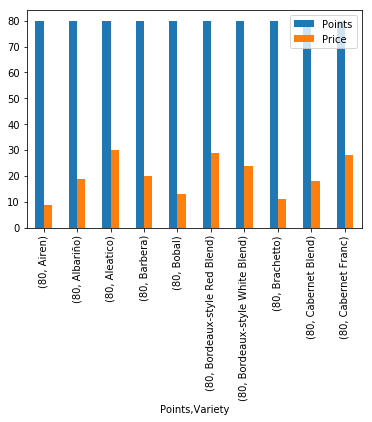

In [51]:
%%time
# Plotting Points and Price grouped by Variety (only ten visible)
reviews_df.groupby(['Points', 'Variety']).apply(lambda reviews_df: reviews_df.loc[reviews_df.Points.argmax()]).head(10).plot.bar()

We can use the same technique to group point and price values by Country and Variety.

CPU times: user 521 ms, sys: 0 ns, total: 521 ms
Wall time: 559 ms


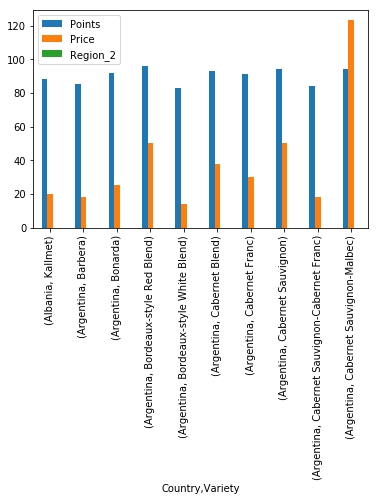

In [52]:
%%time
# Group Point and Price values by Country and Variety
reviews_df.groupby(['Country', 'Variety']).apply(lambda reviews_df: reviews_df.loc[reviews_df.Points.argmax()]).head(10).plot.bar()

### Search Wines by a specific Country

To celebrate RMOTR Graduation...

#### Let's try some Argentinian wine!

Hmmm... but which one do should we try?!

In [53]:
# Get wine from Argentina~!
# Here are the Top Ten Wines sorted by points~!
argentina_top_ten = reviews_df[reviews_df['Country'].str.match('Argentina')]
argentina_top_ten.sort_values("Points", ascending=False).head(10)

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Variety,Winery
Index,,,,,,,,,,
116691,Argentina,"If the color doesn't tell the full story, the ...",Nicasia Vineyard,97,120.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata
121311,Argentina,"If the color doesn't tell the full story, the ...",Nicasia Vineyard,97,120.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata
65331,Argentina,"If the color doesn't tell the full story, the ...",Nicasia Vineyard,97,120.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata
107804,Argentina,This blend from the Nicasia and Adrianna viney...,Argentino,96,123.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata
63766,Argentina,"Features intoxicating pastry, blueberry, cola ...",Nicasia Vineyard,96,123.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata
107806,Argentina,"Features intoxicating pastry, blueberry, cola ...",Nicasia Vineyard,96,123.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata
63764,Argentina,This blend from the Nicasia and Adrianna viney...,Argentino,96,123.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata
83001,Argentina,This wine takes you on a trip to an outer wine...,Gran Corte Las Divas Vineyard,96,50.0,Mendoza Province,Tupungato,NaN,Bordeaux-style Red Blend,Riglos
130756,Argentina,"Features intoxicating pastry, blueberry, cola ...",Nicasia Vineyard,96,123.0,Mendoza Province,Mendoza,NaN,Malbec,Bodega Catena Zapata


### Perfect Scores

Let's analyze the wines that were rated 100 points in the review.

100 Points is considered a 'perfect' rating on this Review scale.

Note: Wine Enthusiast Magazine uses a (1 - 100) rating scale, but they claim to only publish ratings from (80 - 100) on their site.

In [54]:
# Create a new dataframe for the perfect scores records:
perfect_scores_df = reviews_df[reviews_df['Points'] == 100]
perfect_scores_df

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Variety,Winery
Index,,,,,,,,,,
2145,France,"Full of ripe fruit, opulent and concentrated, ...",NaN,100,848.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style White Blend,Château Haut-Brion
19354,US,"In a stunning lineup of Cayuse Syrahs, the En ...",En Chamberlin Vineyard,100,65.0,Oregon,Walla Walla Valley (OR),Oregon Other,Syrah,Cayuse
19355,Australia,Not a Cellar Selection in the traditional sens...,Rare,100,300.0,Victoria,Rutherglen,NaN,Muscat,Chambers Rosewood Vineyards
24151,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,Merlot,Tenuta dell'Ornellaia
26296,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
28954,Italy,"This small, family-run estate in the heart of ...",Guado de' Gemoli,100,195.0,Tuscany,Bolgheri Superiore,NaN,Red Blend,Giovanni Chiappini
41521,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,Merlot,Tenuta dell'Ornellaia
51886,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
78004,Italy,"This small, family-run estate in the heart of ...",Guado de' Gemoli,100,195.0,Tuscany,Bolgheri Superiore,NaN,Red Blend,Giovanni Chiappini


Let's look at some of the data in the new dataframe of 'perfect' wines.

In [55]:
# How many records have a score of 100?
perfect_scores_df.shape

(24, 10)

In [56]:
# Count how many perfect scores per country:
perfect_scores_df["Country"].value_counts()

US           10
Italy         7
France        4
Australia     3
Name: Country, dtype: int64

In [57]:
# Analyze the range in price for perfect score wines by country:
perfect_scores_df.groupby(['Country']).Price.agg([len, min, max])

,len,min,max
Country,,,
Australia,3.0,300.0,300.0
France,4.0,848.0,1400.0
Italy,7.0,195.0,460.0
US,10.0,65.0,245.0


# 2.0 Visualizations

Visualizations are a powerful tool in the Data Science kit.  

Mapping data to a visual representation can provide valuable insight into various patterns and anomalies that might not have been noticed otherwise.  

In addition to being an important analysis tool, visualizations are imperative for reporting and documenting insights within the dataset.

### Styling

First we will set the overall plotting styles (appearance).

This will provide a uniform look to all the plots in the notebook.

Styling done in ```seaborn``` affectes ```matplotlib``` because it is required for ```seaborn``` plotting.
 
See [here](https://seaborn.pydata.org/tutorial/aesthetics.html) for more options on styling ```seaborn```.

In [58]:
%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")
# sns.set_palette("Reds")
# sns.set_context("poster", font_scale=1.0)

### Raw Data

A quick visualization with the ```plot()``` method from ```matplotlib``` to check that everything is working.

```x = reviews_df.index``` 

```y = reviews_df["price"]```

Here we are literally plotting each record in the order it appears in the dataset by price.

This plot has no organizational meaning - it's only to test that out libraries are functioning and the styling is set.

This is a good example of how raw data has little meaning until it has been processed.

CPU times: user 27.9 ms, sys: 0 ns, total: 27.9 ms
Wall time: 50.4 ms


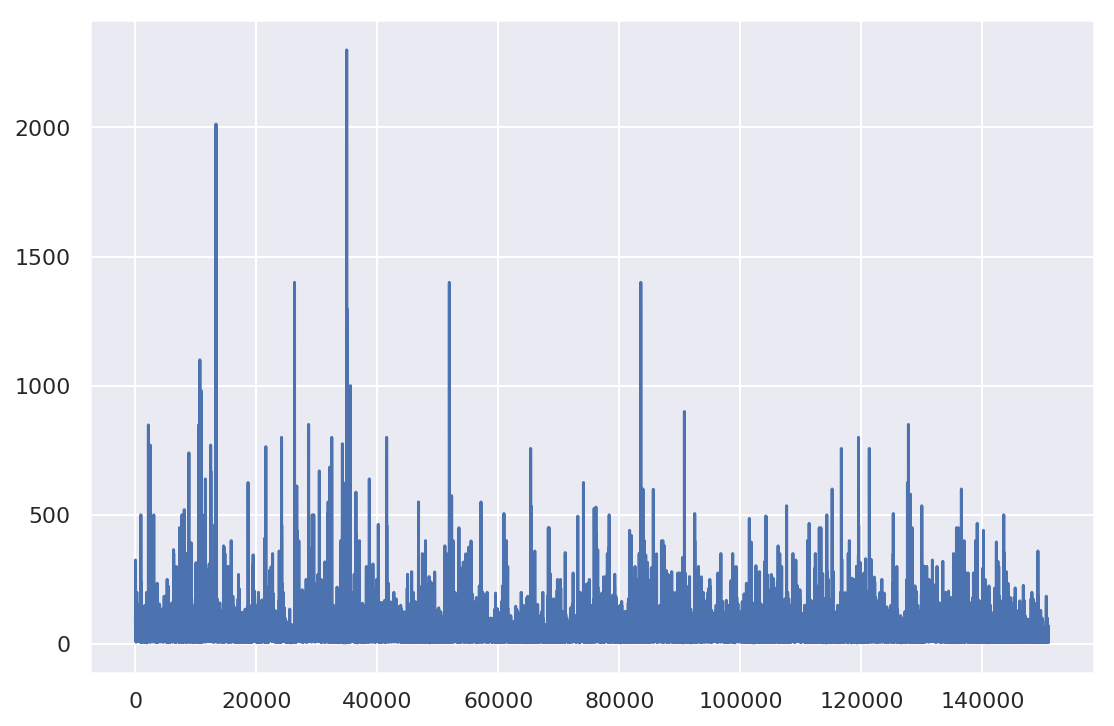

In [59]:
%%time
# Matplotlib to show random order by price
plt.plot(reviews_df.index, reviews_df["Price"])

Now we can format the data and create some meaningful visualizations.

### Province Totals

This bar graph shows the top ten records for the ```province``` column in the ```reviews_df``` dataframe.

With a visualization, we can quickly compare the media price by country.

I notice that there is an outlier that should have been handled for a Country named "US-France" with the highest price.

We will ignore for now - it is probably an invalid record.

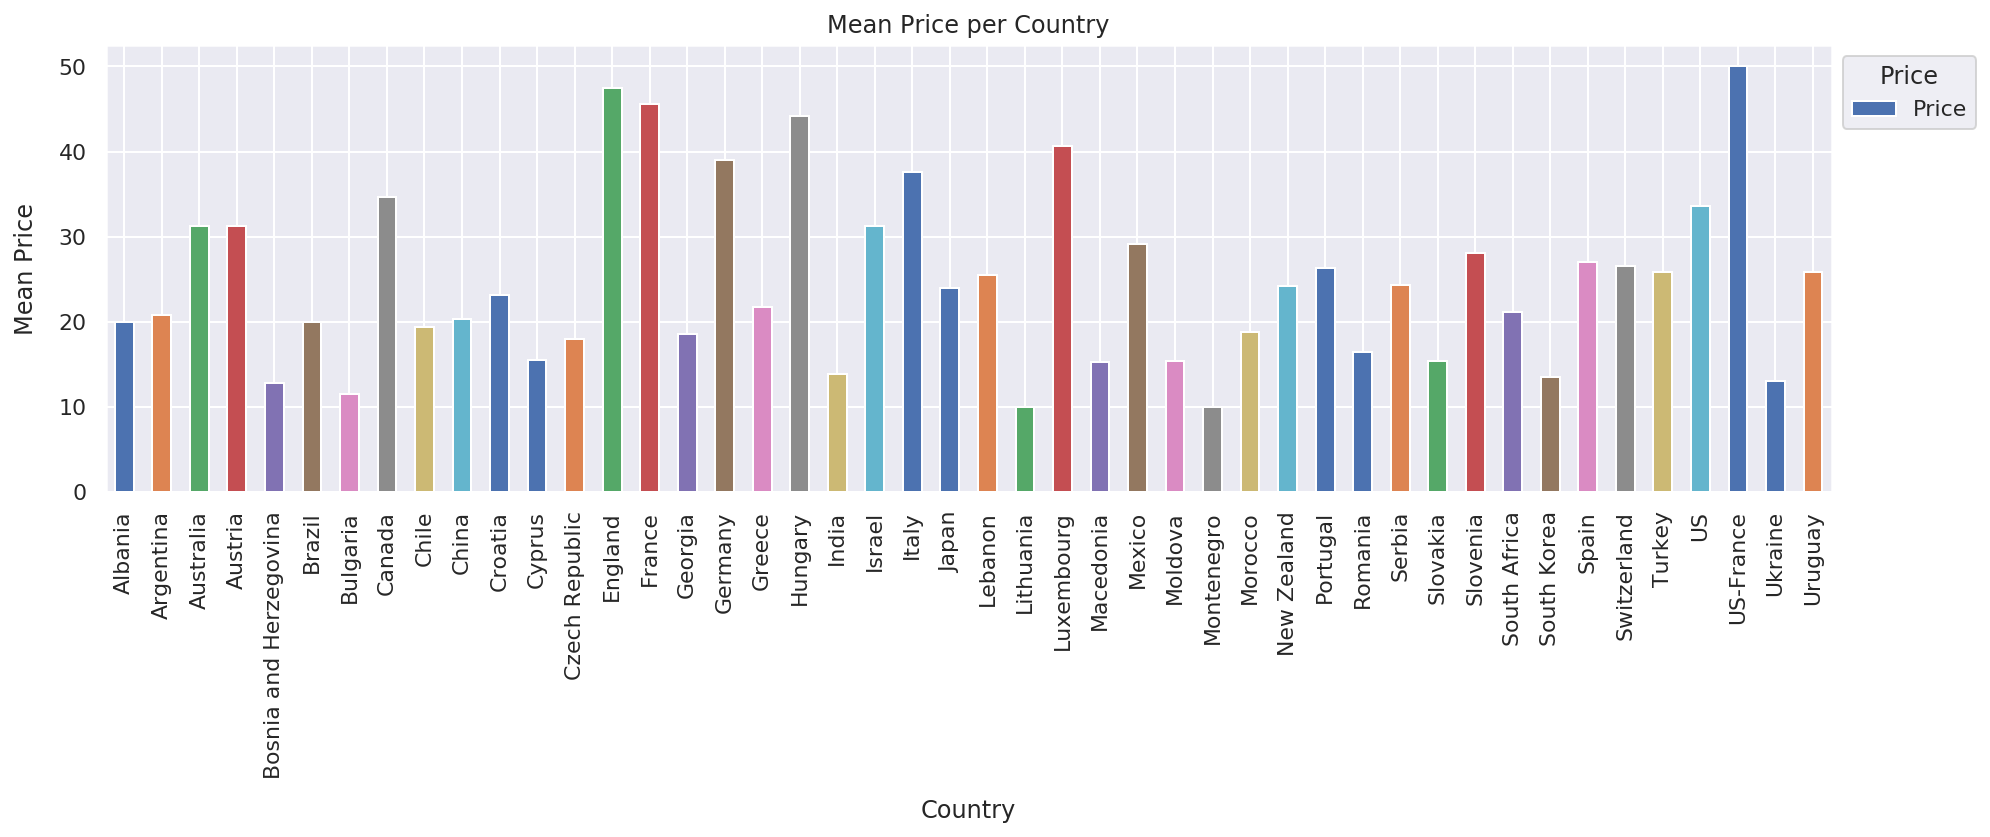

In [60]:
fig, ax = plt.subplots(figsize=(14, 6))

reviews_df.groupby(reviews_df['Country'])['Price'].mean().plot.bar()
mean_price = reviews_df["Price"].mean(0)
reviews_df["Price"].fillna(mean_price)

# Creates labels
ax.set_xlabel('Country')
ax.set_ylabel('Mean Price')
# Sets the plot title
ax.set_title("Mean Price per Country")
ax.legend(bbox_to_anchor=(1, 1), loc=2, title='Price')

fig.tight_layout()

Let's see which Province had the most reviews in the dataset.

CPU times: user 90.6 ms, sys: 218 µs, total: 90.8 ms
Wall time: 89.1 ms


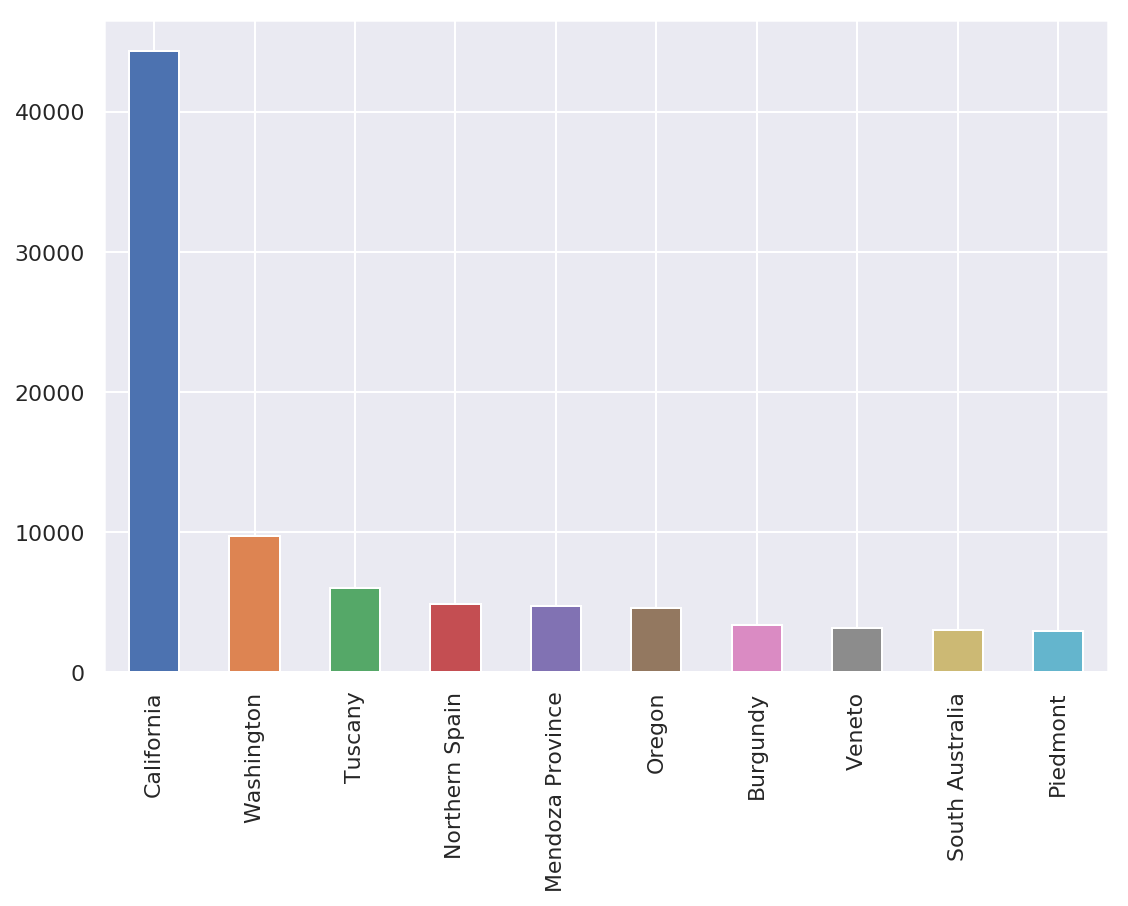

In [61]:
%%time
reviews_df['Province'].value_counts().head(10).plot.bar()

### California

How many reviews did the most reviewed Province (California) have?

How many reviews did the most reviewed Province (California) have

In [62]:
#
top_province = reviews_df['Province'].value_counts().head(1)
print("The province with the most reviews is {}".format(top_province))

The province with the most reviews is California    44355
Name: Province, dtype: int64


We can also calculate the percentage of reviews by Province and plot the data to compare.

CPU times: user 32.7 ms, sys: 7.02 ms, total: 39.7 ms
Wall time: 37.9 ms


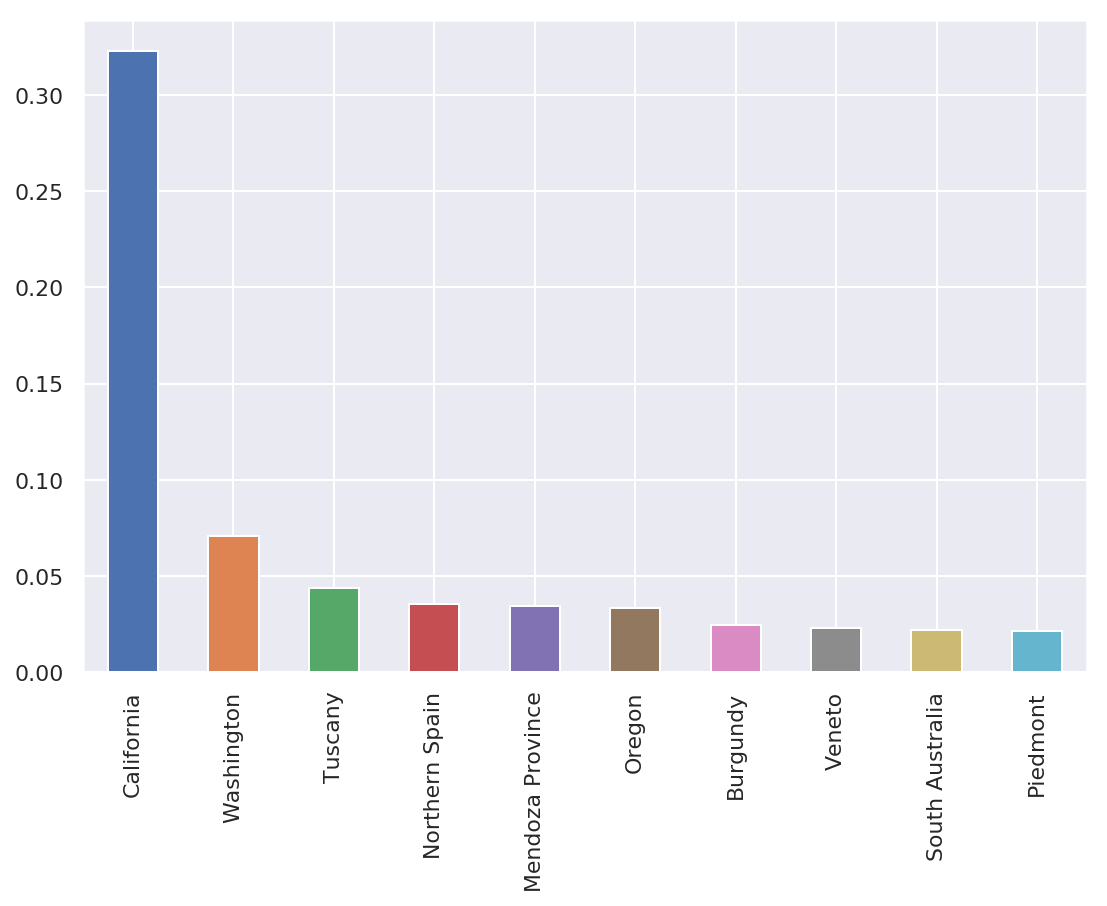

In [63]:
%%time
# Bar plot - Percentage of reviews per top ten provinces
(reviews_df['Province'].value_counts().head(10) / len(reviews_df)).plot.bar()

### Plotting Points

Here we plot a distribution of the points plotted by the review counts.

CPU times: user 38.2 ms, sys: 3.71 ms, total: 41.9 ms
Wall time: 43.1 ms


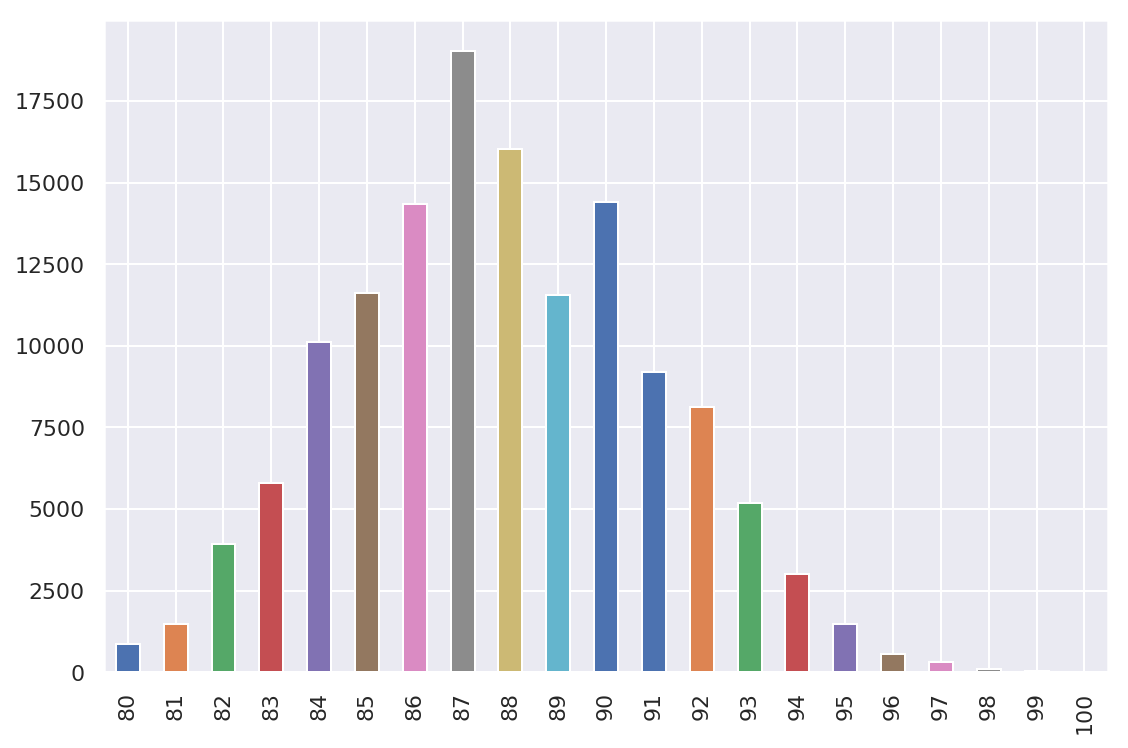

In [64]:
%%time
# Bar plot - points/reviews
reviews_df['Points'].value_counts().sort_index().plot.bar()

Line plot of points by review count.

CPU times: user 26.2 ms, sys: 294 µs, total: 26.5 ms
Wall time: 24.6 ms


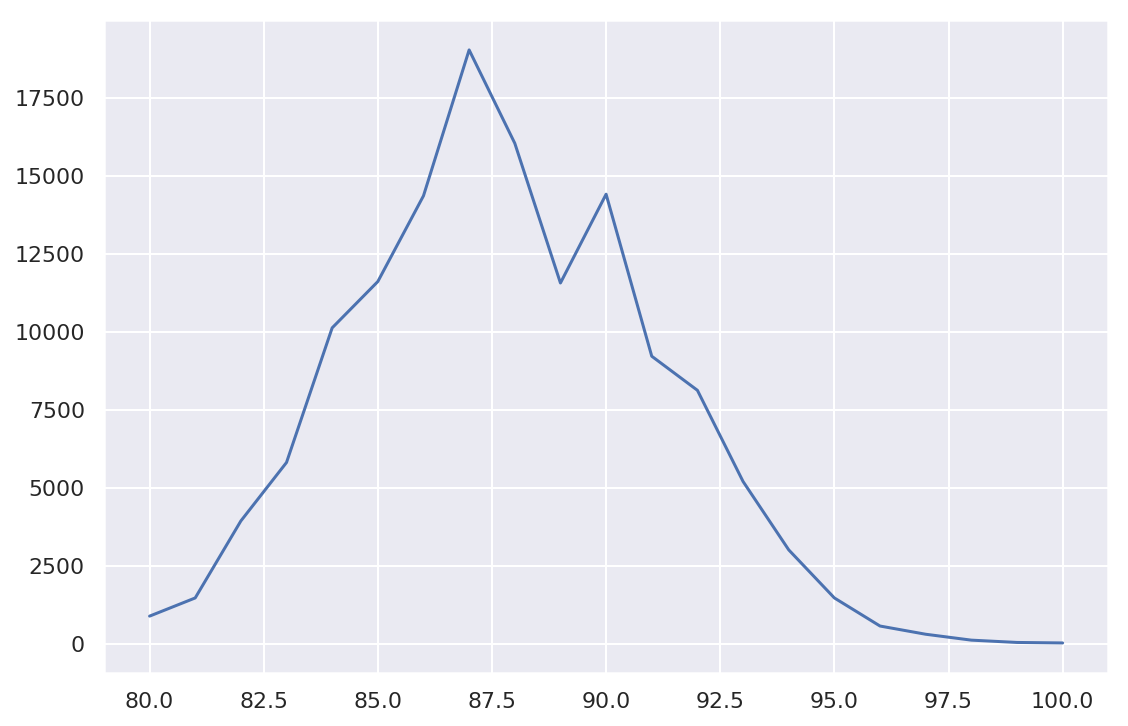

In [65]:
%%time
# Line plot of points/reviews
reviews_df['Points'].value_counts().sort_index().plot.line()

# Seaborn

```seaborn``` is a powerful plotting library used for Data Science.

### Countplot

The ```pandas``` bar chart becomes a ```seaborn``` countplot.


CPU times: user 38.1 ms, sys: 268 µs, total: 38.4 ms
Wall time: 49.4 ms


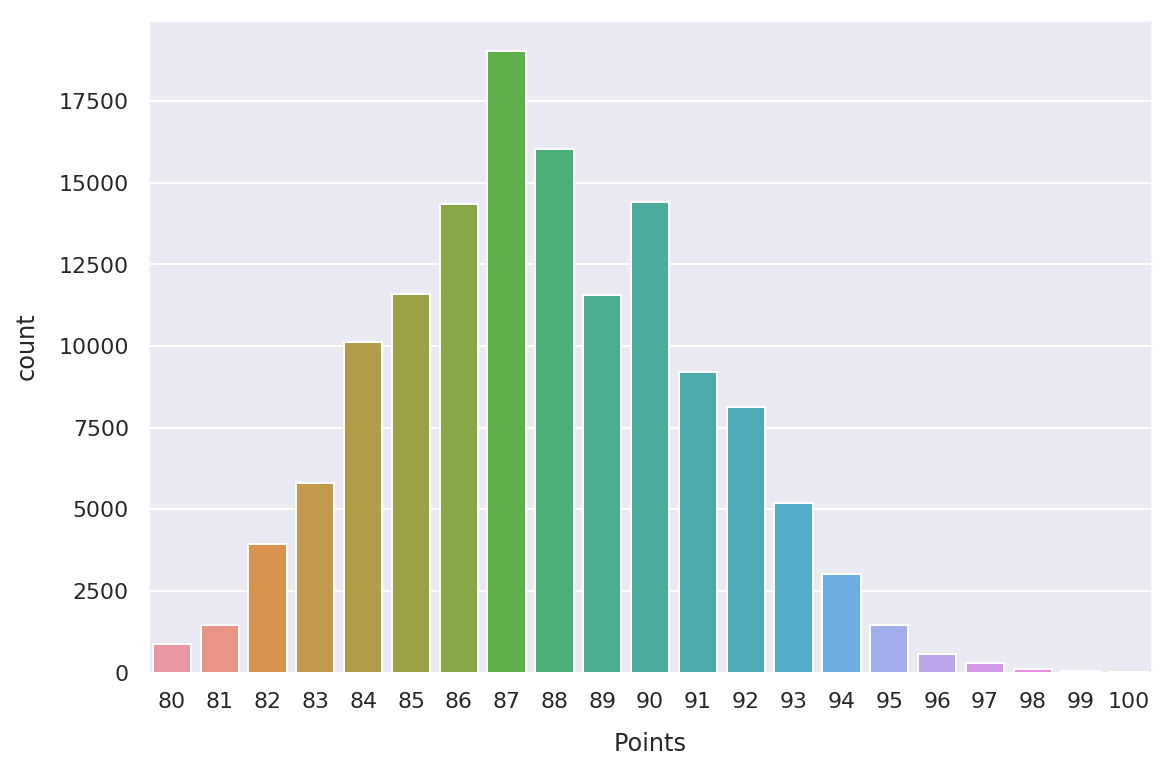

In [66]:
%%time
# Countplot - Distribution of points and how many reviews
sns.countplot(reviews_df['Points'])

### Kernel Density Estimation Plot

Kernel density helps estimate preditions based on the available data.  

The model uses the kernel (focus) density to assist in preditions in future models.

First, let's view a ```jointplot()``` of price and points.  This will help us verify that the KDE plot is accurate.

CPU times: user 436 ms, sys: 149 ms, total: 585 ms
Wall time: 565 ms


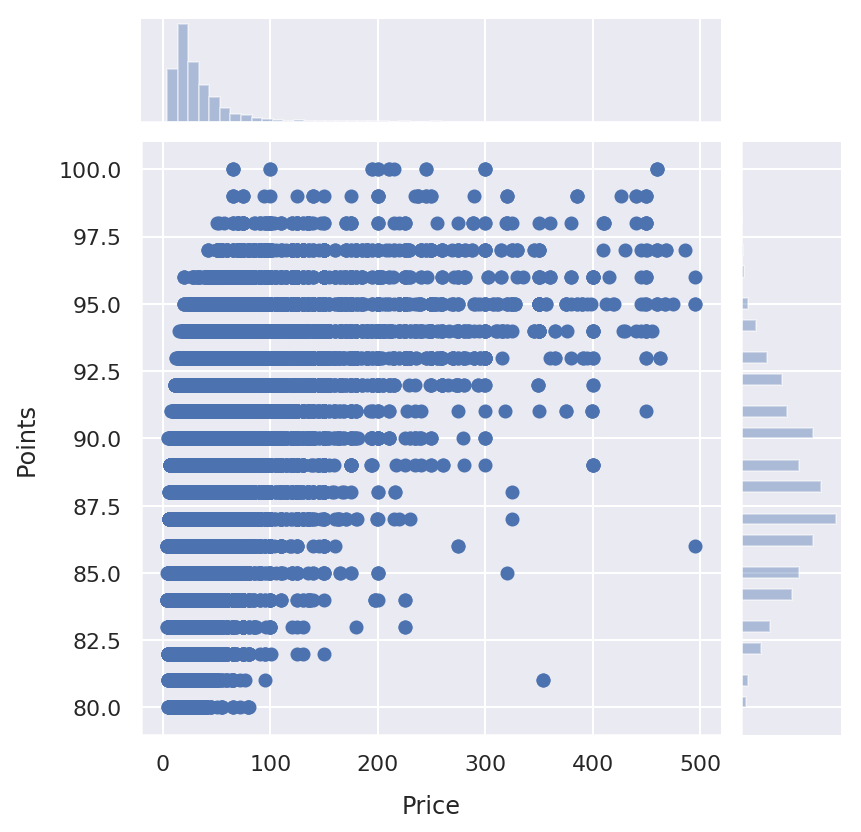

In [73]:
%%time
# Jointplot
sns.jointplot(x='Price', y='Points', data=reviews_df[reviews_df['Price'] < 500])

CPU times: user 2.63 s, sys: 0 ns, total: 2.63 s
Wall time: 2.64 s


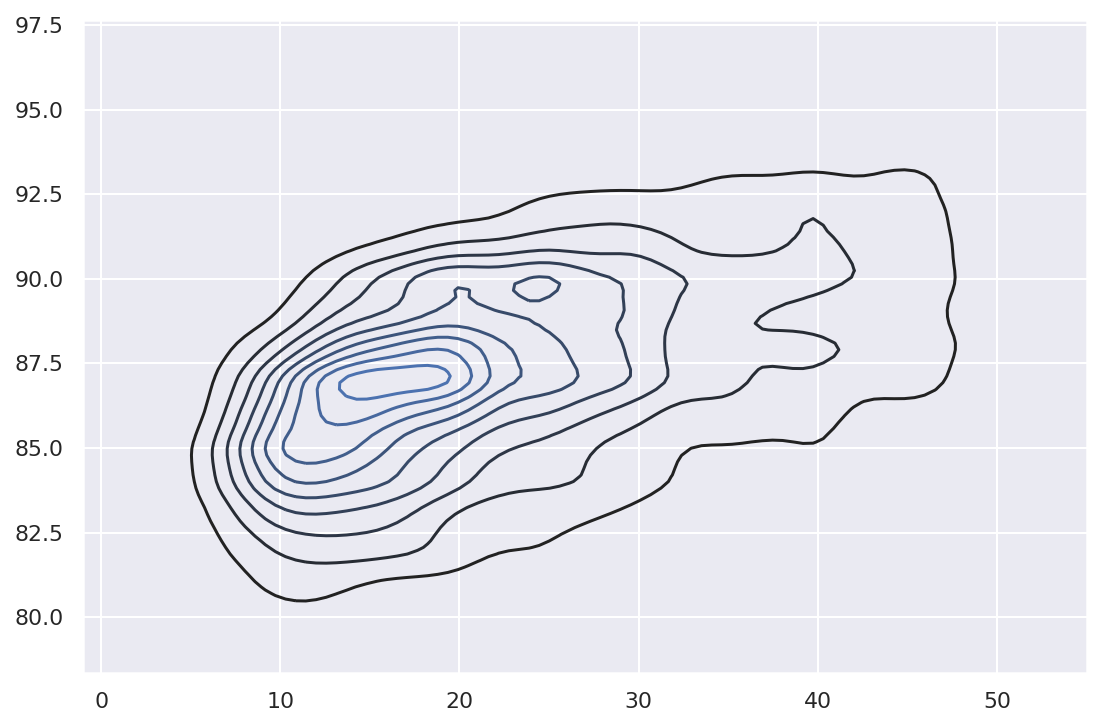

In [68]:
%%time
# Plotted price and point value KDE Chart
sns.kdeplot(reviews_df[reviews_df['Price'] < 50].loc[:, ['Price', 'Points']].dropna().sample(5000))

A Hex grid allows us to visualize the data from the KDE and jointplots.  

Here we can clearly see the density of point and pricing and how they interact.

It appears that the wines in the 10.00 - 20.00 range have the highest concentration of consistent points.

This means that overall, wines in the 10.00 - 20.00 range have frequently better ratings when compared to more expensive wines.

This could be due to the price point of these wines, or the fact that most consumers drink expensive wines less frequently for special occasions.

It makes sense for the wine producers to focus on the market demand for their products and target their resources towards the taste of the public.

CPU times: user 238 ms, sys: 69.4 ms, total: 308 ms
Wall time: 317 ms


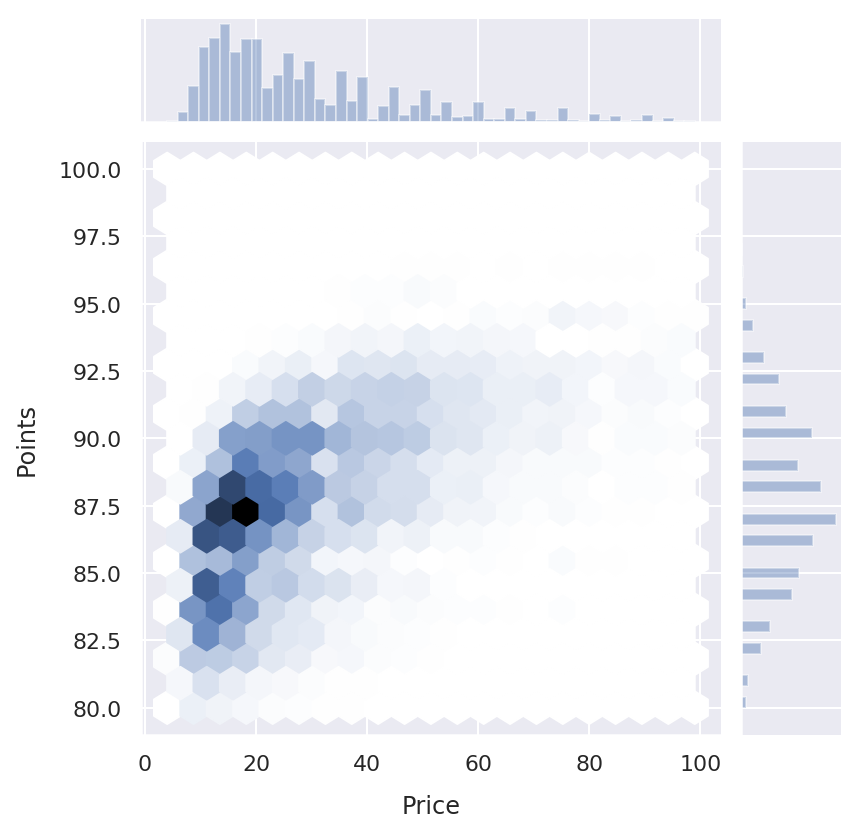

In [69]:
%%time
# Hex grid
sns.jointplot(x='Price', y='Points', data=reviews_df[reviews_df['Price'] < 100], kind='hex', 
              gridsize=20)

Drilling down further, we can plot those wines that are under 60.00 because we know that that area has the highest population density.

CPU times: user 333 ms, sys: 58.3 ms, total: 392 ms
Wall time: 401 ms


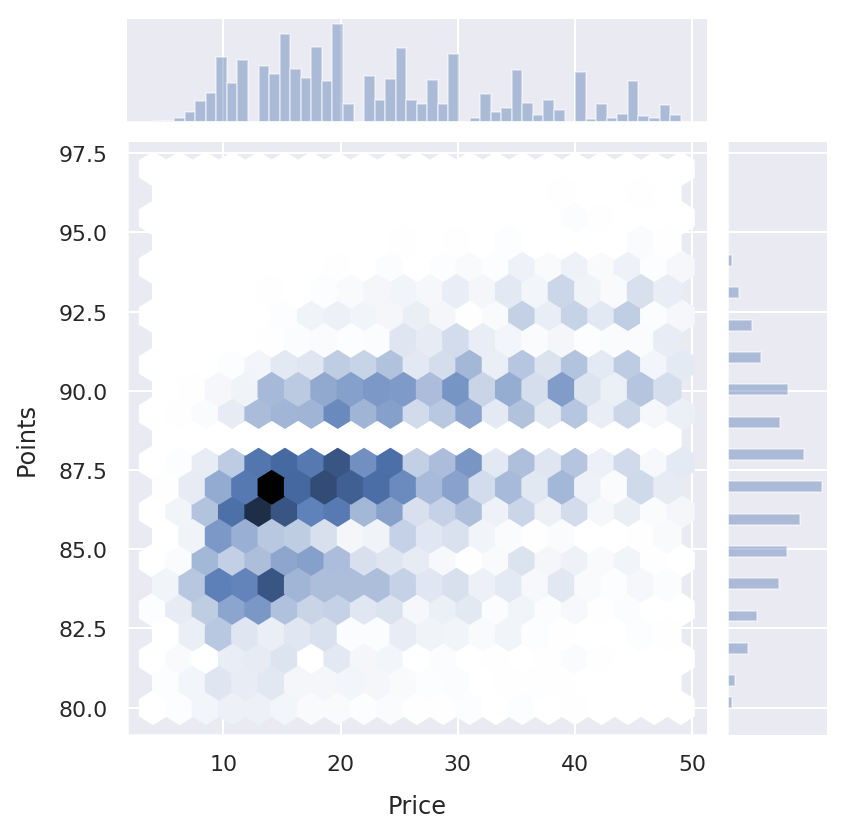

In [70]:
%%time
# Hex grid
sns.jointplot(x='Price', y='Points', data=reviews_df[reviews_df['Price'] < 50], kind='hex', 
              gridsize=20)

Now you can clearly see that wines that cost between 12.00 and 18.00 have the highest point value to price density, and are probably the best bet for your dollar.

Based on the Wine Reviews, it is highly likely that a Chardonnay made in California priced between 12.00 and 18.00 will be the best damn wine purchase you ever make.

### Linear Regression Plot

Linear Regression is used to statistically predict values based on the population of existing data.

```seaborn``` has a plot named ```regplot``` we can use to build the regression model.

This dataset is problematic in some ways due to the fact that the range for the point spread is very narrow (80 - 100), while the domain for the price range is very broad and densely focused in the consumer price point quartile.

We will need to drill down further in to the data to get a better idea of the model.

CPU times: user 9.34 s, sys: 53.2 ms, total: 9.39 s
Wall time: 9.41 s


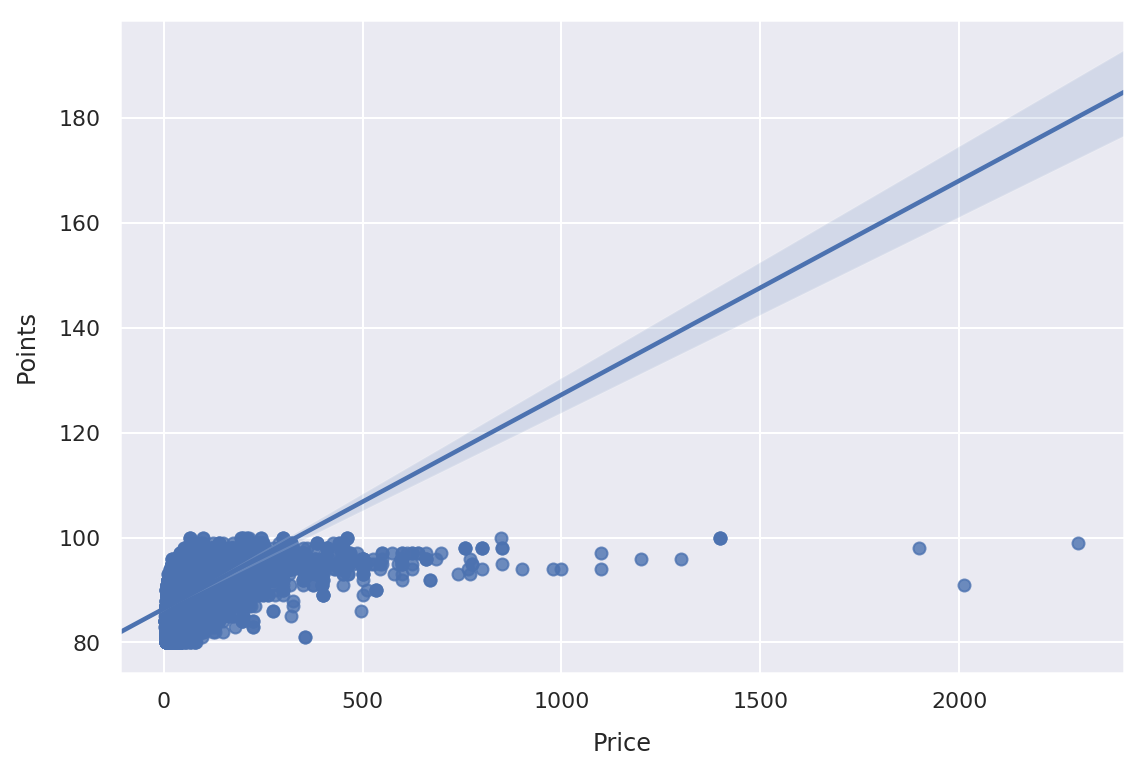

In [71]:
%%time
# Line of best fit (Linear regression)
ax = sns.regplot(x="Price", y="Points", data=reviews_df)

Since the data is spread out so much for the Price values, we can drill down and view the Regression model in depth by using Points as the ```y-axis``` values.

There is a better fit to the data, but still the regression models show no correlation between Price and Points in the Wine Reviews.  

We can conclude that there is no correlation between price and quality in commercial Wines.

CPU times: user 20 s, sys: 78.3 ms, total: 20.1 s
Wall time: 20.2 s


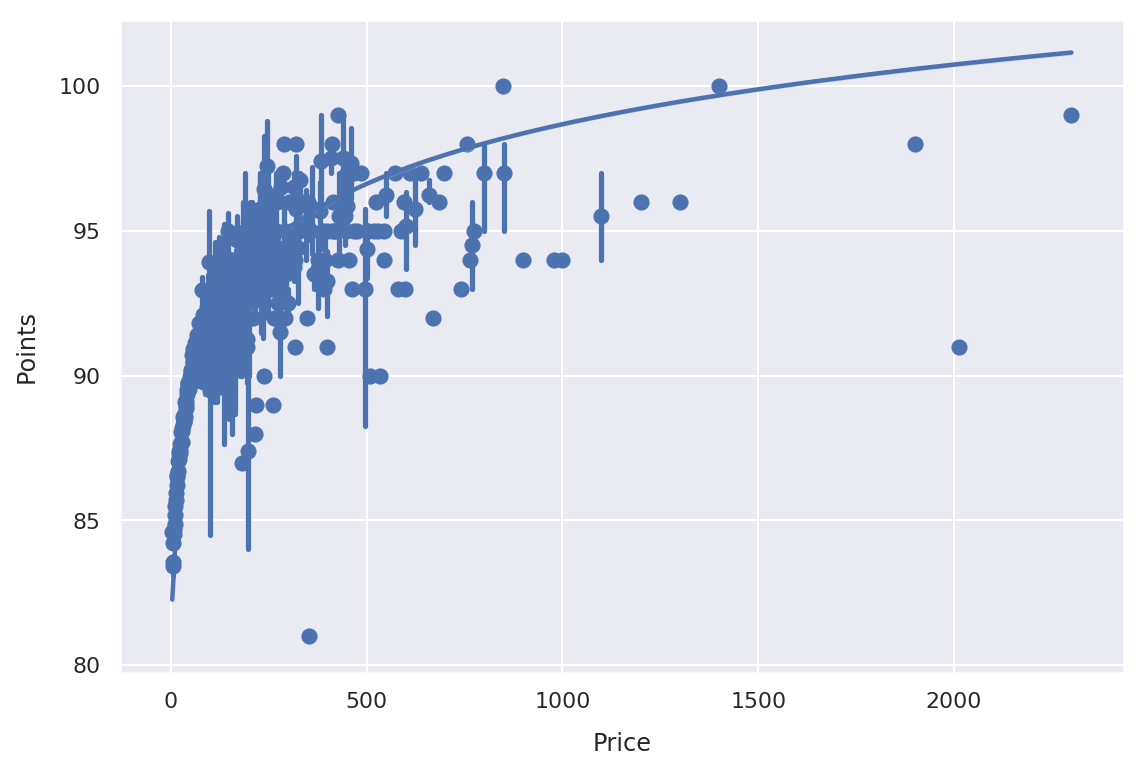

In [72]:
%%time
# Zoomed in Linear Regression
ax = sns.regplot(x=reviews_df["Price"], y="Points", data=reviews_df, x_estimator=np.mean, logx=True, truncate=True)

# 3.0 Interpret the Data

### Questions

#### Which country had the most reviews?

The United States had the most reviews at 62,138 reviews.

This makes sense because Wine Enthusiast Magazine is based in the United States.

The United States is also well known for its wine producing states like Oregon and California.

#### What was the cheapest wine?

The least costly wine was only $4.00.

Surprisingly there were several $4.00 wines with point values in the 80s.

#### Which country produced the most costly wine?

France produced the most costly wine at $2,300 USD made in the Bourdeaux Region.

#### What was the average price of a bottle of wine in the reviews dataset?

The average cost was about $33.00.  Affordable, but a bit pricey for non-afficionados.

#### Which Province was the most reviewed?

California was the most reviewed Province and Chardonnay was the most reviewed wine.

Final analysis: 

We have 100% confidence that the ladies in California love their Chardonnay!

### Results

After cleaning and inspecting the Wine Reviews dataset, we used numerical and statistical analysis to create visualizations from the dataset.  Using the focused plotting of point distributions, jointplots, and heatmaps, it has been determined that the best value of wines in the 150,930 reviews is as follows:

- Made in California
- A Chardonnay, Pinot Grigio, or Cabernet Savignon
- 12.00 - 18.00 USD per bottle
- 87.5 or greater points is highly likely

### Conclusions

- California is well known for its Wine producing industry, and agriculture capabilities.

- This means that overall, wines in the 10.00 - 20.00 range have frequently better ratings when compared to more expensive wines.

- This could be due to the price point of these wines, or the fact that most consumers drink expensive wines less frequently or only for special occasions.

- It makes sense for the wine producers to focus on the market demand for their products and target their resources towards the taste of the public.

- There is no correlation between price and quality when comparing the majority of commercial wines.

![Python_Pura_Vida](https://user-images.githubusercontent.com/19881320/54723911-6588d580-4b3f-11e9-8de5-e9d9f5f34f45.jpg)

What did you think about the Wine Review Analysis?

Let's talk.

## Contact Information

William Ponton: [LinkedIn](https://www.linkedin.com/in/williamponton/) 

Email: [@gorbulus](waponton@gmail.com)

REPL: [@gorbulus](https://repl.it/@gorbulus)

Github: [gorbulus](https://github.com/gorbulus)

![Python_3](https://user-images.githubusercontent.com/19881320/54723915-67529900-4b3f-11e9-8a94-0424e55da789.jpg)